<a href="https://colab.research.google.com/github/dilip-ramesh-sharma/DILIP_002674474_LAB/blob/main/Assignment1_ML_Data_Cleaning_and_Feature_Selection_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abstract:**

Credit card fraud is a widespread issue affecting financial institutions, merchants, and customers. As the use of credit cards for online transactions continues to grow, detecting fraudulent activities in real-time has become a critical concern. Here, in this assignment, we will be using a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020.

The dataset consist of:
1. Credit card transactions of 1000 customers doing transaction across 800 merchants.
2. 22 features excluding the index column.
3. The feature is_fraud is the label/depedent variable and others are independent variables.

Variable Description:

->trans_date_trans_time - Period(Date & Time) - When a particular transaction occured

->cc_num - Credit card number used in the transaction

->merchant - Merchant name, where the transaction was done

->category - Type of tranaction. Eg. Shopping online, Gas, Grocery, Food Dining,etc.

->amt - Transaction amount

->first - First Name of the person doing the transaction

->last - Last Name of the person doing the transaction

->gender - Male(M)/Female(F)

->street, city, state, zip - Address details of the user

->lat, long - Latitude and Longitude of the credit card user

->city_pop - Population of the city where the transaction occured

->job - Profession of the user

->dob - Date of birth

->trans_num - Unique trasanction number of each transaction

->unix_time - Time respresentation in seconds

->merch_lat, merch long - Latitude and Longitude of the merchant

->is_fraud - Output variable, whether transaction is fraud or not(0/1)


In [ ]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=27cbc81a8a807dda7ee20e5d5edd504f7d6cf300a5628c88cf560c1161170f06
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

**Reading the dataset.**

In [ ]:
data = pd.read_csv("https://media.githubusercontent.com/media/dilip-ramesh-sharma/data_science_engineering_repository/main/fraudTrain.csv")

In [ ]:
#Viewing the data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
print("Data dimension: {} {}".format(data.shape[0], data.shape[1]))

Data dimension: 1296675 23


# **Data Cleaning & Feature Selection**

**Handling missing values**

In [ ]:
#checking if there are any data missing
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

As it can be seen, no data is missing from any of the columns, which means it is not required to impute or remove the null values from the data.
However, to meet the matrix requiremnt, imputation is performaed in the later parts of the notebook.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

**Standardizing data types**

In [ ]:
# converting trans_date_trans_time to datetime

data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [ ]:
# Remove unnecessary columns (example removing 'trans_num' and 'Unnamed: 0')
data.drop(['trans_num', 'Unnamed: 0'], axis=1, inplace=True)

Dropped index and transaction number columns as both have unique values and are of no significance.

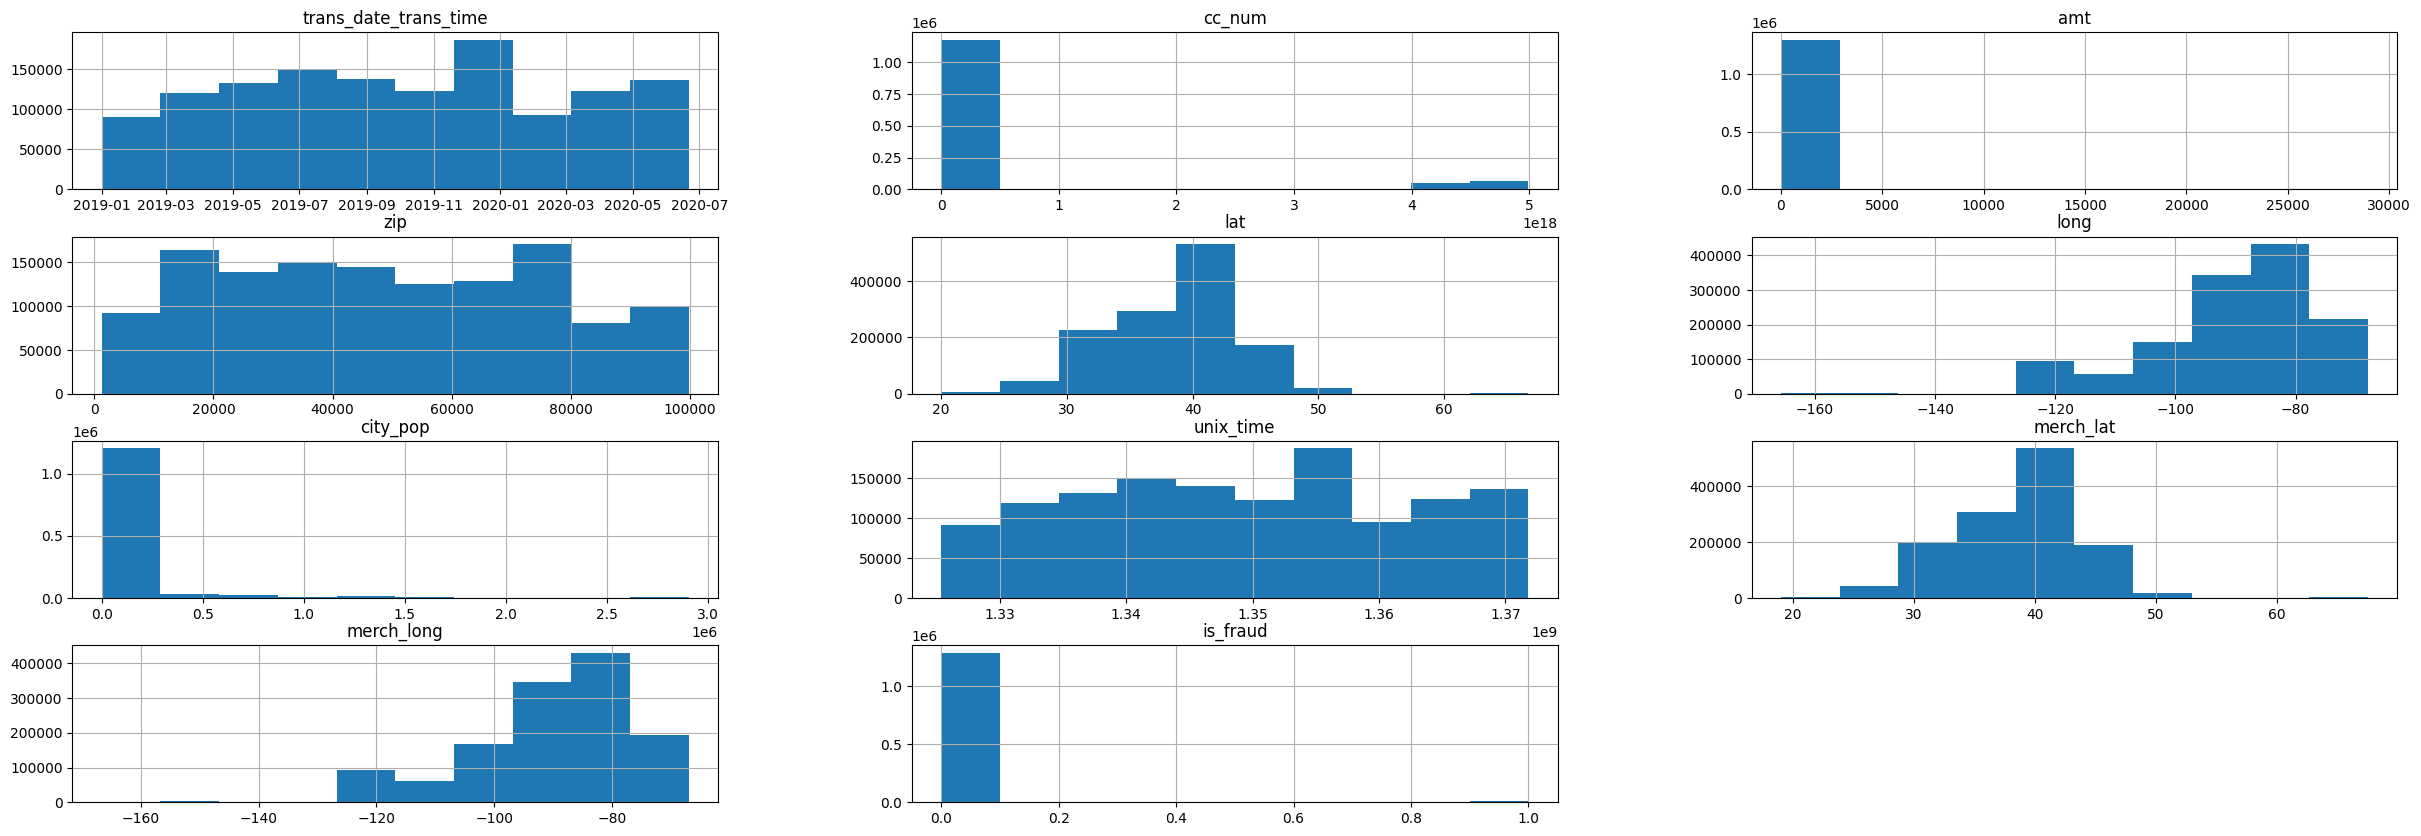

In [ ]:
# Plot histograms for each numerical variable in dataframe
data.hist(figsize=(30, 10))
plt.show()

**Now doing the Q-Q plot for the dataset.**

The above histogram plot helps us to visualize the distribution of data for our dataset.

<Figure size 576x360 with 0 Axes>

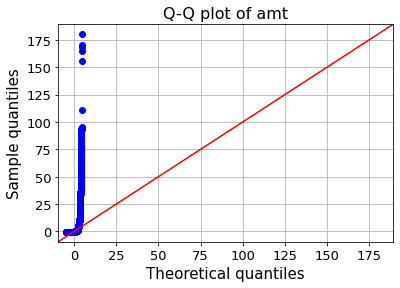

<Figure size 576x360 with 0 Axes>

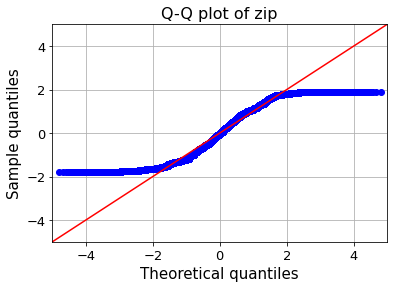

<Figure size 576x360 with 0 Axes>

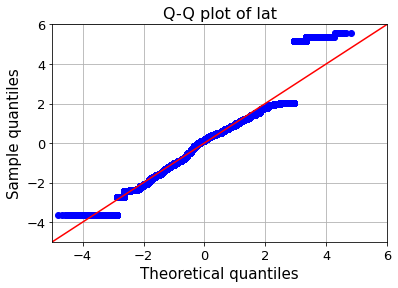

<Figure size 576x360 with 0 Axes>

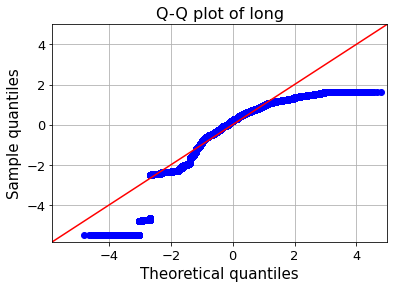

<Figure size 576x360 with 0 Axes>

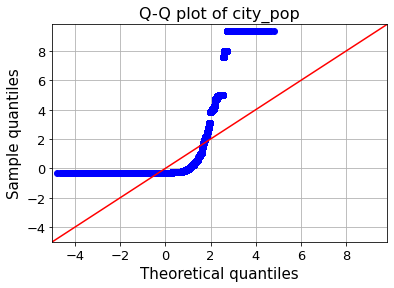

<Figure size 576x360 with 0 Axes>

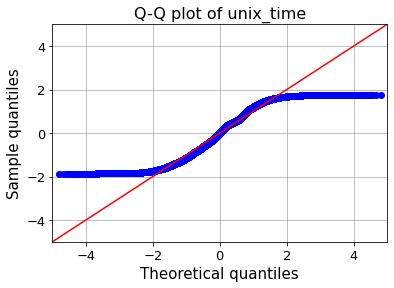

<Figure size 576x360 with 0 Axes>

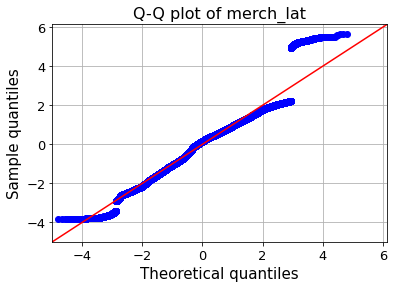

<Figure size 576x360 with 0 Axes>

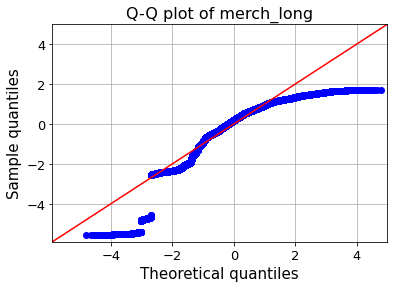

In [ ]:
#checking the distribution of numerical variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

The qqplot also helps us to have an idea of the data, whether it is normally distributed or skewed.

It can be seen that few features are almost normally distributed whether feature like amt, city_pop are skewed.



Will now check the correlation among the independent features and will see how they are helping in detecting the fradulent transaction.

**Correlation among the variables**

<ipython-input-19-b0fae52aa676>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

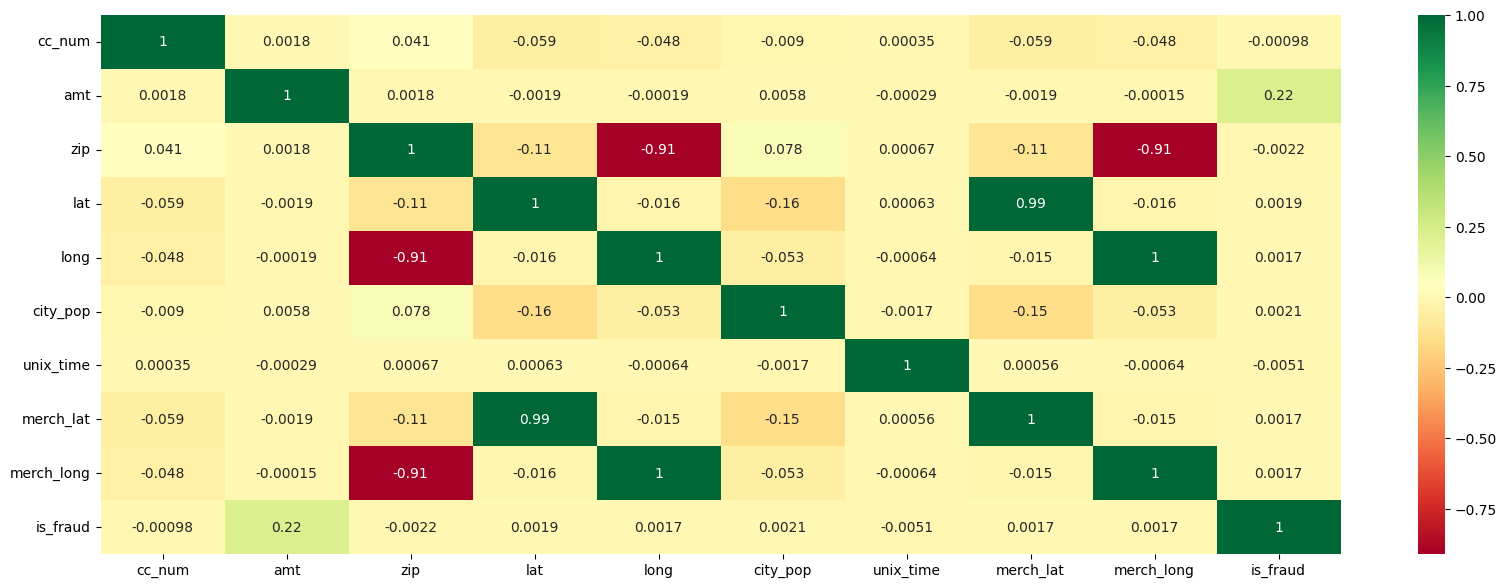

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

The correlation depicts features like amt, zip, city_pop, lat, long are impacting the fraudulent transaction.

Now further exploring and looking into feature transformation and working on selection on imp features.

In [ ]:
#Converting dob,trans_date_trans_time  column in dataset and creating new 'trans_date' column.
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_date']=data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
data['trans_date']=pd.to_datetime(data['trans_date'])
data['dob']=pd.to_datetime(data['dob'])

In [ ]:
data.trans_date.head(),data.dob.head()

(0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [ ]:
data["is_fraud_cat"]=data.is_fraud.apply(lambda x: "T" if x==1 else "F")
data["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1296675, dtype: object

In [ ]:
df_cat=data.select_dtypes(include=['object'])
data[df_cat.columns]

,merchant,category,first,last,gender,street,city,state,job,is_fraud_cat
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",F
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,F
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,F
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,F
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,F
...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,F


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


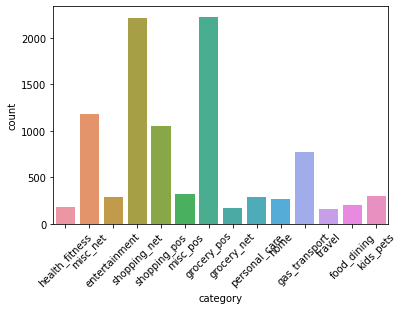

In [ ]:
sns.countplot(data[data['is_fraud_cat']=="T"].category)
plt.xticks(rotation=45)
plt.show()

Majority frauds occured in categories of shopping_net,shopping_pos and grocery_pos

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


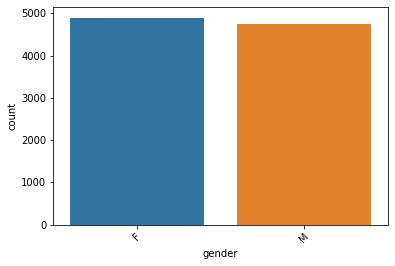

In [ ]:
sns.countplot(data[data['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

There is only a slight difference between Male & Females fraud tranaction count.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


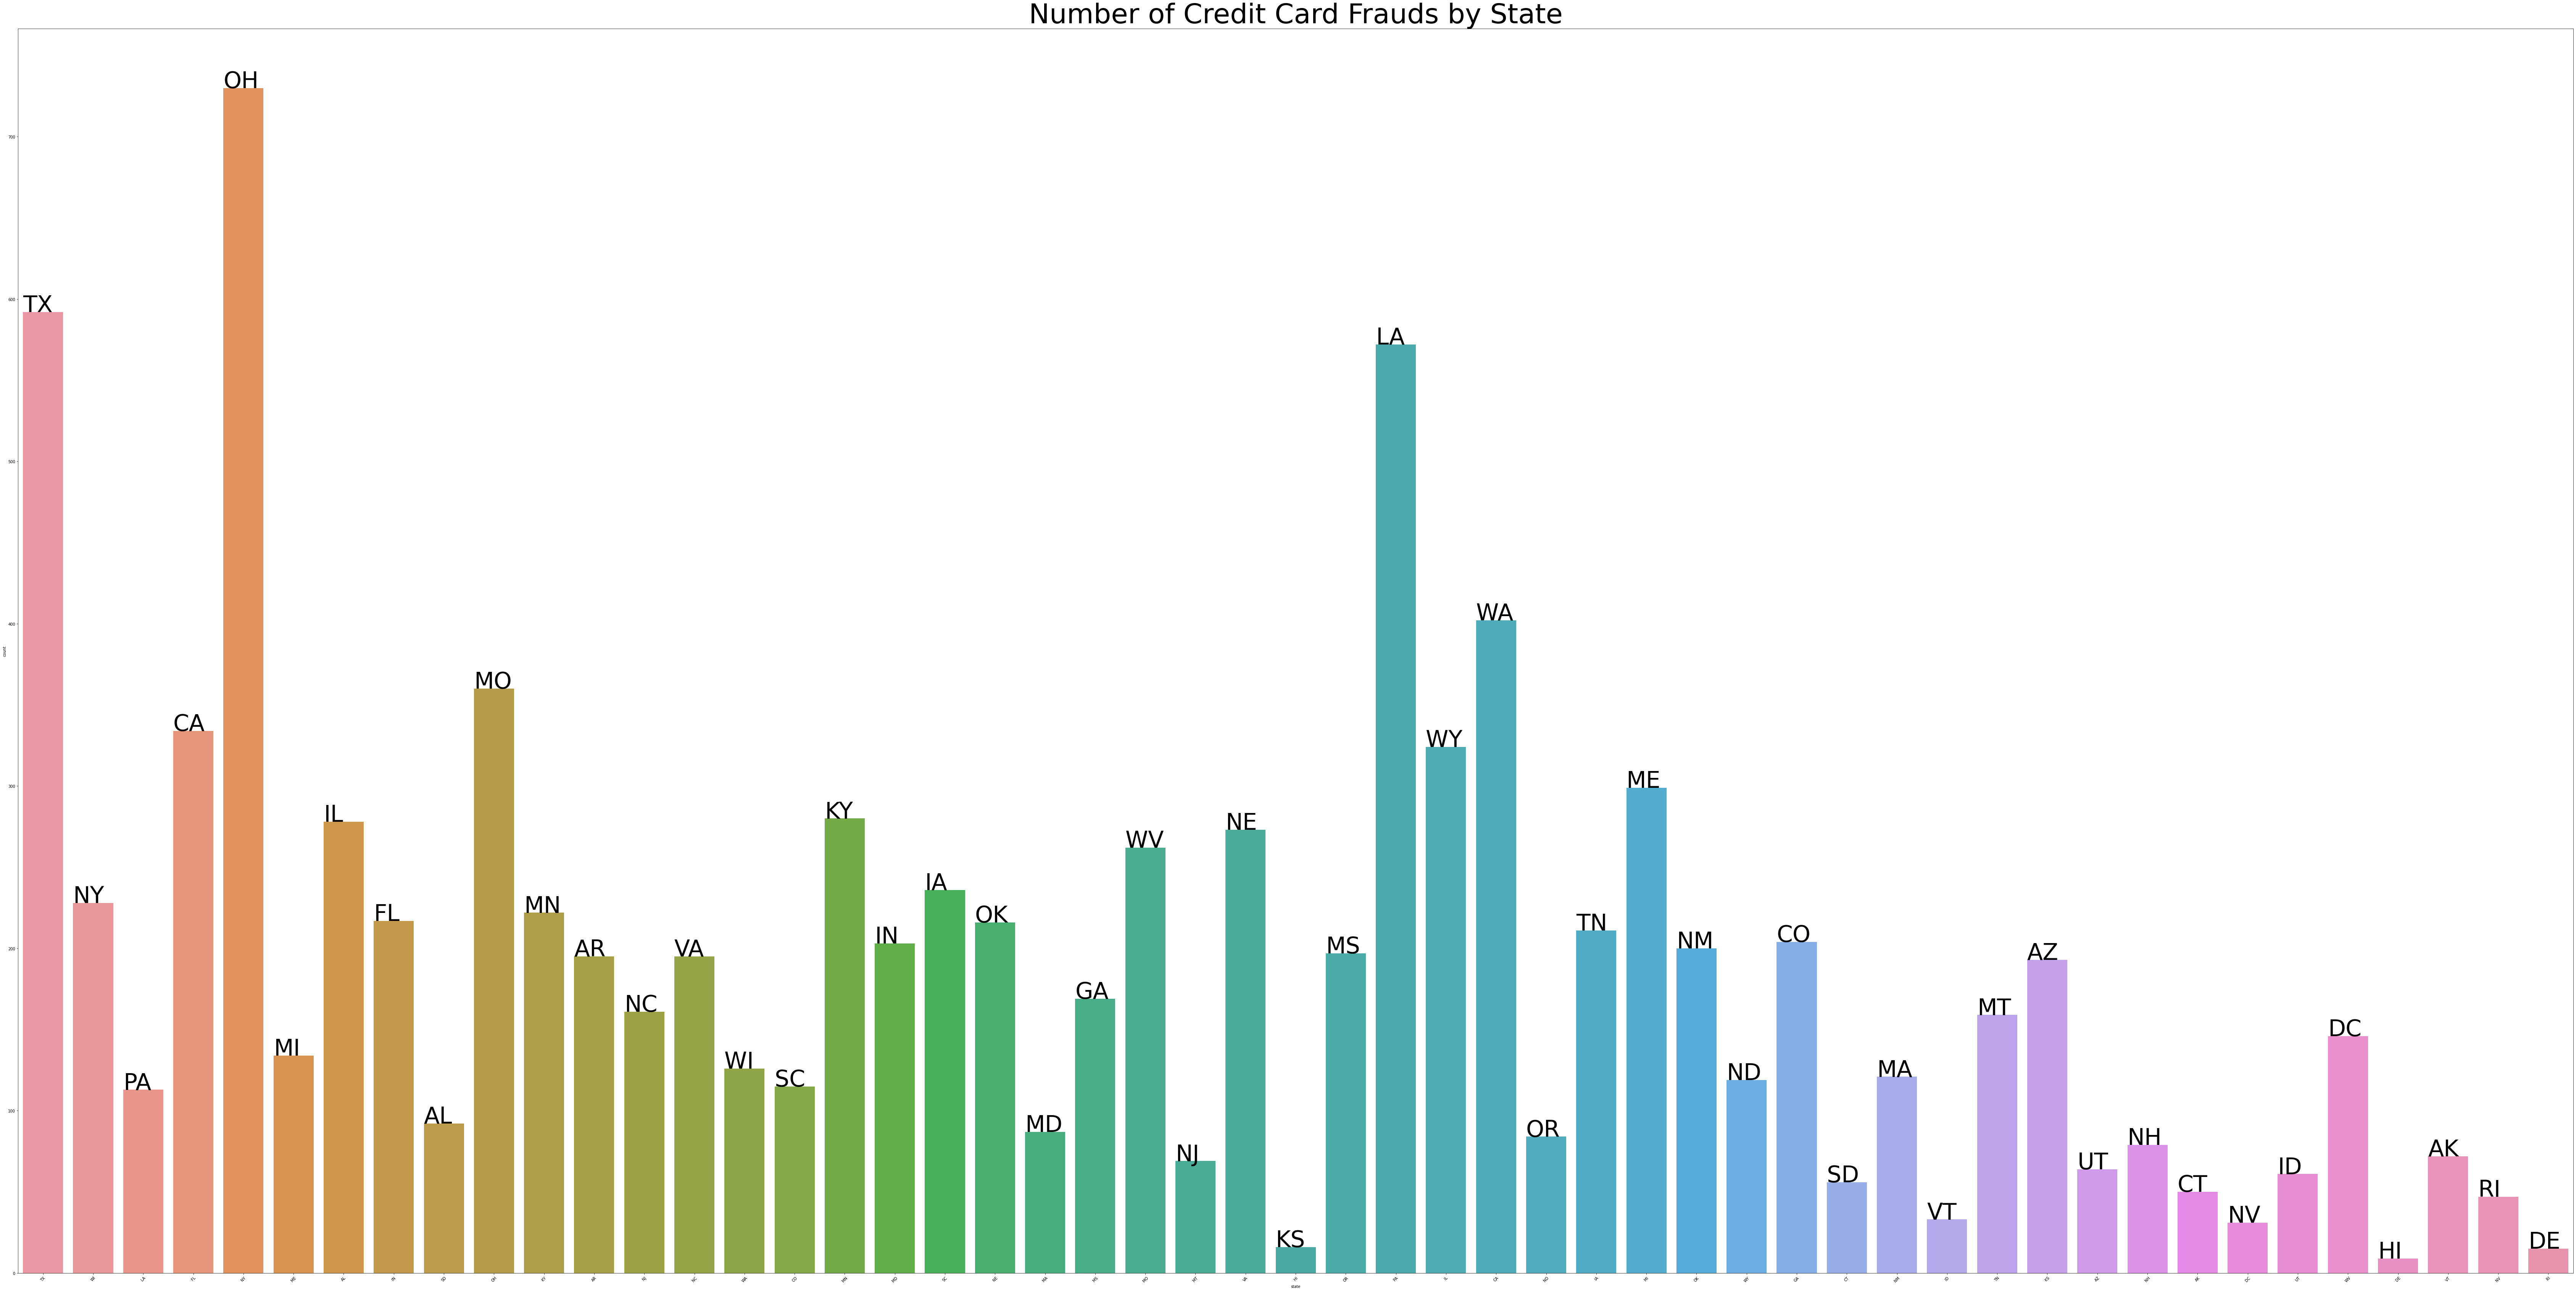

In [ ]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(data[data['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, data["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

States OH, TX and LA report the most number of credit card frauds

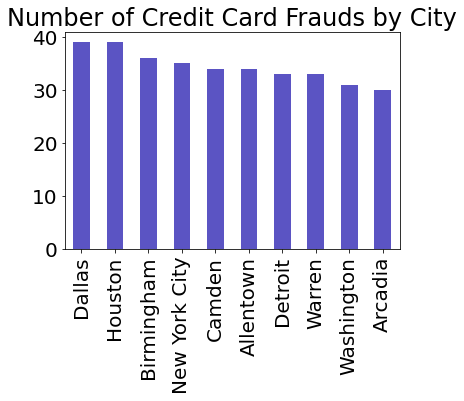

In [ ]:
import random
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
data[data['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

Dallas,Houston and Birmingham report the most frauds city wise.

In [ ]:
columns = data.select_dtypes(include=['int64', 'float64']).columns

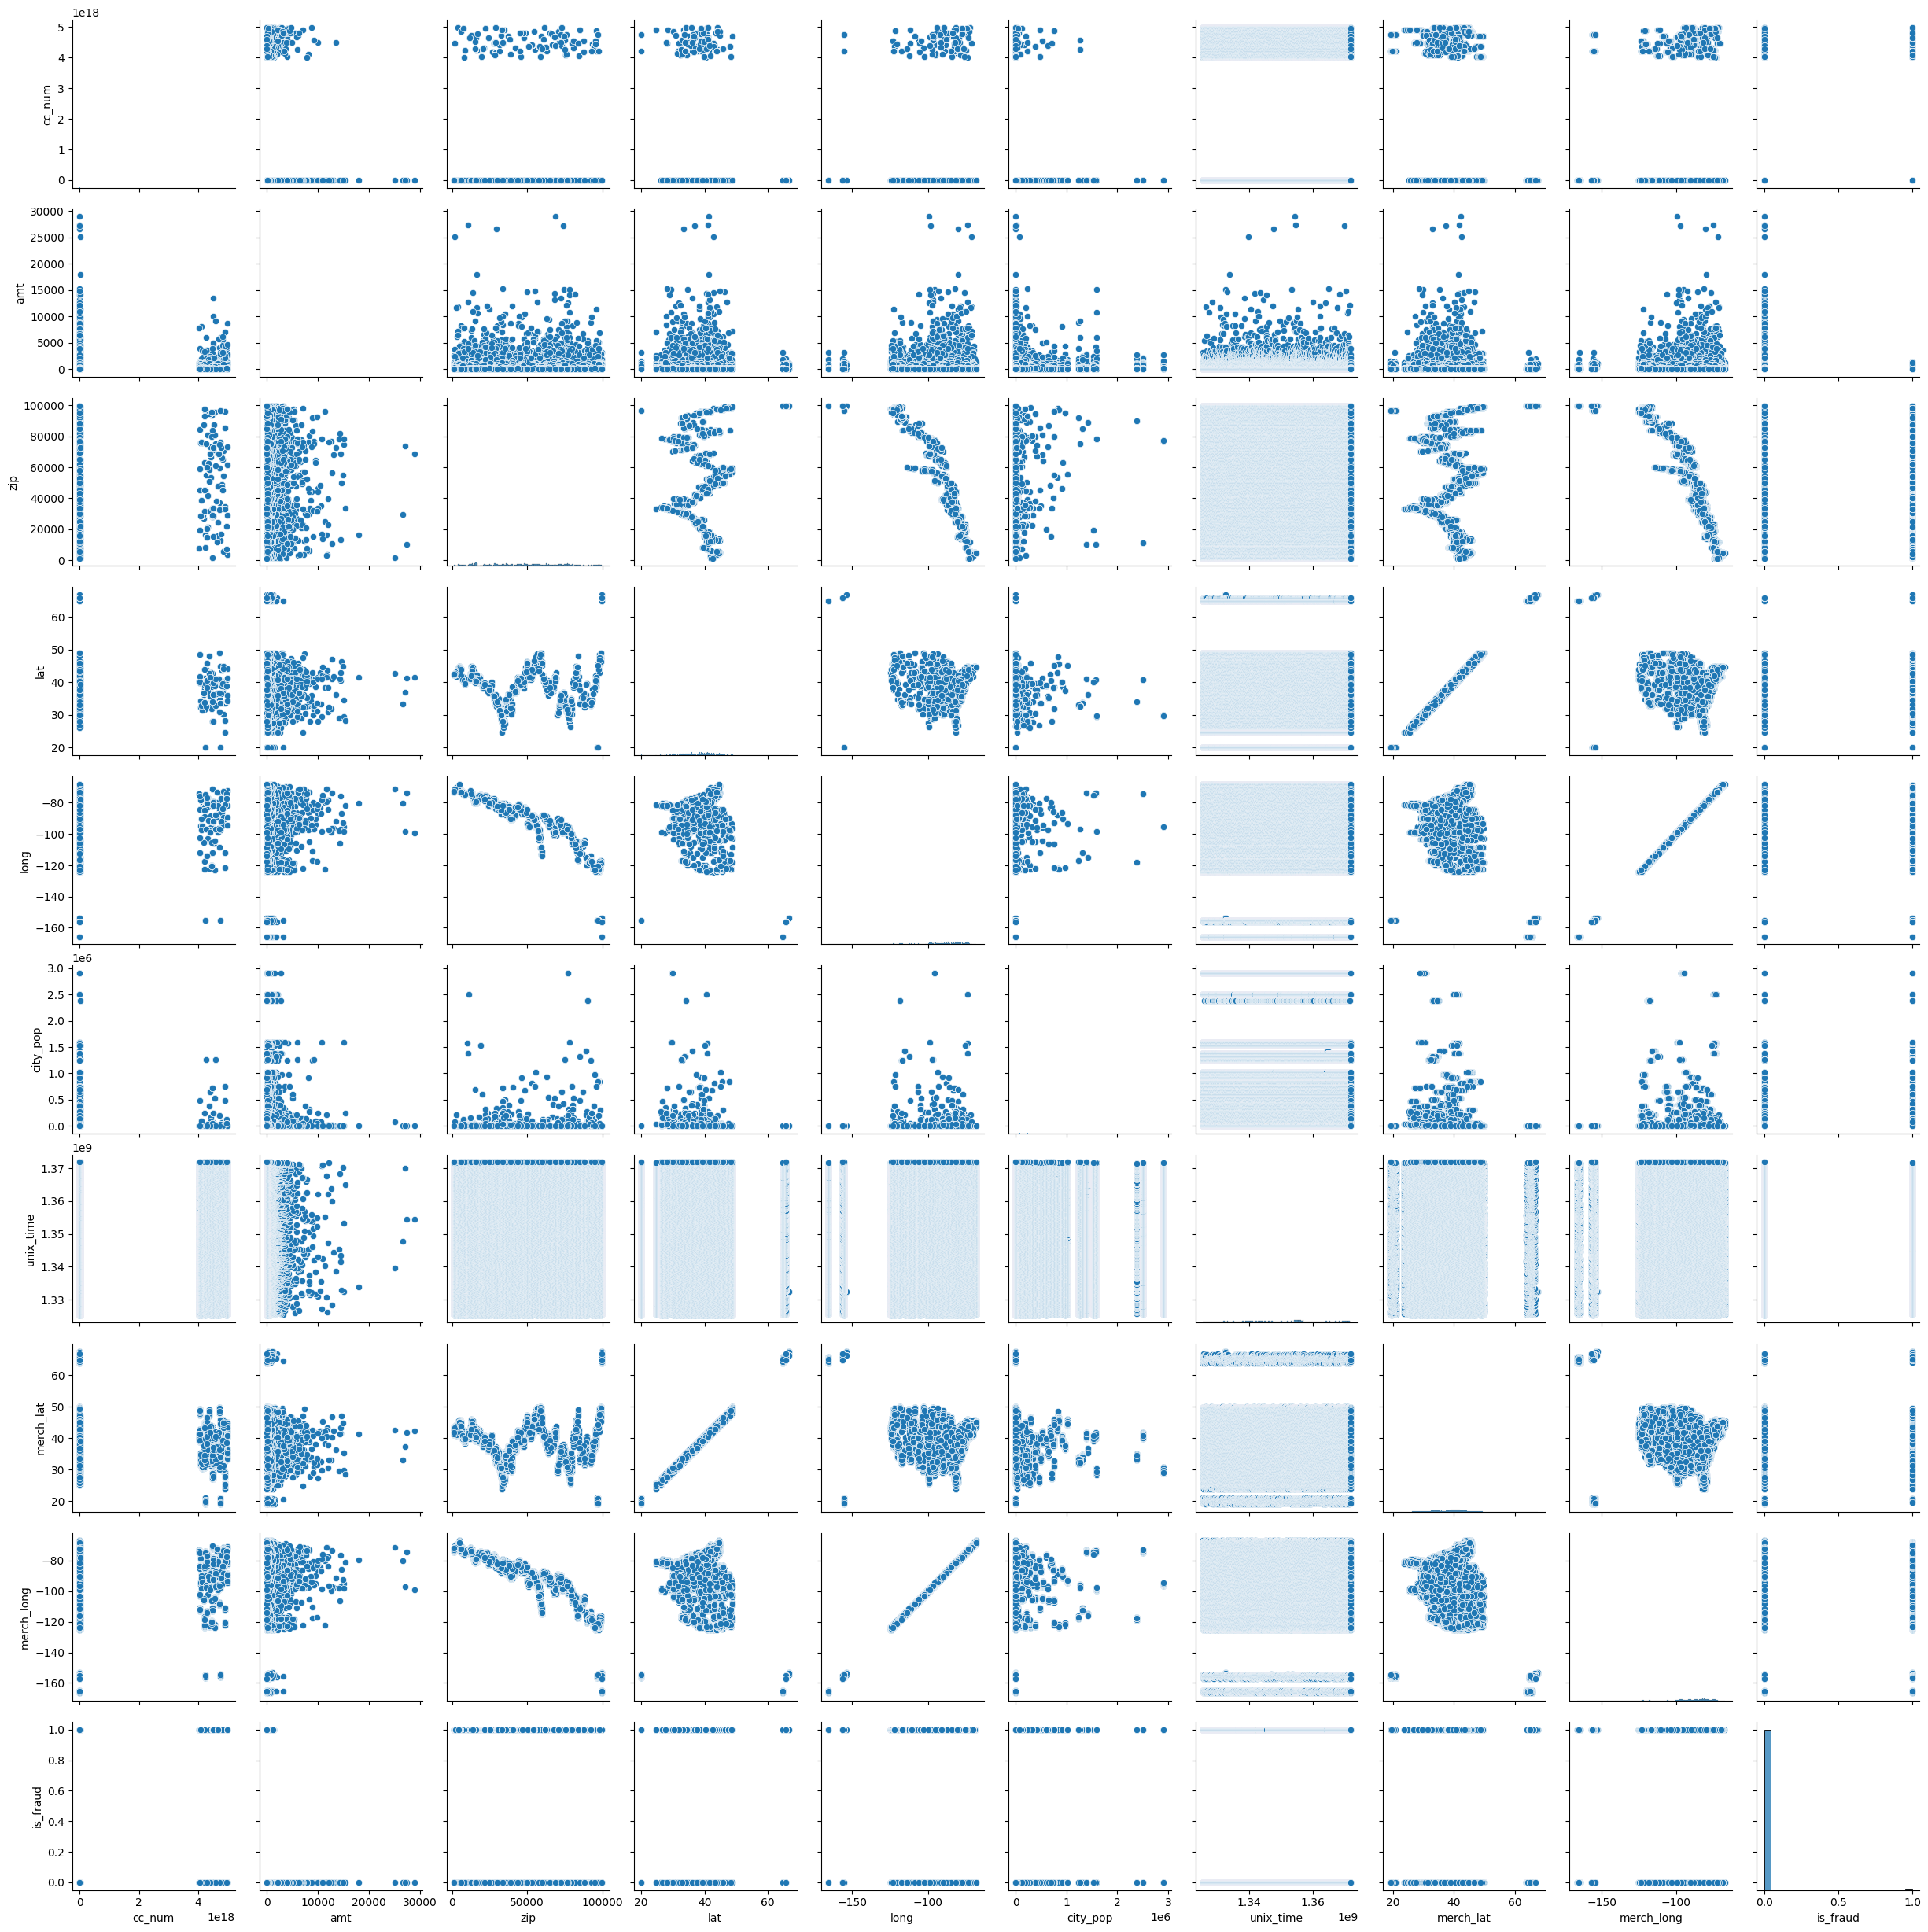

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(data)

Heighest correlation is between merc_long & the customer long.

**Identifing predictor significance**

In [ ]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    data["is_fraud"],
    data[columns],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               is_fraud   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.068
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.361
Time:                        04:33:46   Log-Likelihood:             1.5040e+06
No. Observations:             1296675   AIC:                        -3.008e+06
Df Residuals:                 1296671   BIC:                        -3.008e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cc_num     -4.936e-23   5.09e-23     -0.969      0.333   -1.49e-22    5.05e-23
amt        -4.994e-14   2.06e-14     -2.424      0.015   -9.03e-14   -9.56e-15
zip         -6.23e-09   2.49e-09     -2.505      0.012   -1.11e-08   -1.36e-09
lat         1.151e-13   4.65e-14      2.476      0.013     2.4e-14    2.06e-13
long        2.906e-12   1.16e-12      2.505      0.012    6.33e-13    5.18e-12
city_pop    5.827e-10   2.21e-10      2.633      0.008    1.49e-10    1.02e-09
unix_time   4.489e-12   1.03e-13     43.470      0.000    4.29e-12    4.69e-12
merch_lat   1.151e-13   4.65e-14      2.476      0.013     2.4e-14    2.06e-13
merch_long  2.906e-12   1.16e-12      2.505      0.012    6.33e-13    5.18e-12
is_fraud    3.915e-17   1.55e-17      2.525      0.012    8.76e-18    6.95e-17
==============================================================================
Omnibus:                  2283478.007   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1557112033.435
Skew:                          13.029   Prob(JB):                         0.00
Kurtosis:                     170.754   Cond. No.                     1.86e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+19. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Imputation of Data

In [ ]:
# remove 1%, 5% & 10% data randomly
df_1per = data[['amt', 'city_pop']];
col_list = ['amt', 'city_pop']
for col in col_list:
    df_1per.loc[df_1per.sample(frac=0.01).index, col] = pd.np.nan

df_5per = data[['amt', 'city_pop']];
for col in col_list:
    df_5per.loc[df_5per.sample(frac=0.05).index, col] = pd.np.nan

df_10per = data[['amt', 'city_pop']];
for col in col_list:
    df_10per.loc[df_10per.sample(frac=0.10).index, col] = pd.np.nan

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [ ]:
df_1per.isnull().sum()

amt         29533
city_pop    29645
dtype: int64

In [ ]:
df_5per.isnull().sum()

amt         145580
city_pop    145481
dtype: int64

In [ ]:
df_10per.isnull().sum()

amt         285131
city_pop    284668
dtype: int64

**MEAN Inputer**

In [ ]:

from sklearn.impute import SimpleImputer
# 1%
imp_mean_1 = SimpleImputer(strategy='mean')
imp_mean_1.fit(df_1per)
imp_mean_df_1per = imp_mean_1.transform(df_1per)
imp_mean_df_1per = pd.DataFrame(imp_mean_df_1per,columns = ['amt', 'city_pop'])
imp_mean_df_1per.isnull().sum()

amt         0
city_pop    0
dtype: int64

In [ ]:
# 5%
imp_mean_5 = SimpleImputer(strategy='mean')
imp_mean_5.fit(df_5per)
imp_mean_df_5per = imp_mean_5.transform(df_5per)
imp_mean_df_5per = pd.DataFrame(imp_mean_df_5per,columns = ['amt', 'city_pop'])
imp_mean_df_5per.isnull().sum()

amt         0
city_pop    0
dtype: int64

In [ ]:
#10%
imp_mean_10 = SimpleImputer(strategy='mean')
imp_mean_10.fit(df_10per)
imp_mean_df_10per = imp_mean_10.transform(df_10per)
imp_mean_df_10per = pd.DataFrame(imp_mean_df_10per,columns = ['amt', 'city_pop'])
imp_mean_df_10per.isnull().sum()

amt         0
city_pop    0
dtype: int64

**Median Inputer**

In [ ]:
# 1%
median_imputer_1 = SimpleImputer(strategy='median')
median_imputer_1.fit(df_1per)
imp_median_df_1per = median_imputer_1.transform(df_1per)
imp_median_df_1per = pd.DataFrame(imp_median_df_1per,columns = ['amt', 'city_pop'])
imp_median_df_1per.isnull().sum()

amt         0
city_pop    0
dtype: int64

In [ ]:
# 5%
median_imputer_5 = SimpleImputer(strategy='median')
median_imputer_5.fit(df_5per)
imp_median_df_5per = median_imputer_5.transform(df_5per)
imp_median_df_5per = pd.DataFrame(imp_median_df_5per,columns = ['amt', 'city_pop'])
imp_median_df_5per.isnull().sum()

amt         0
city_pop    0
dtype: int64

In [ ]:
# 10%
median_imputer_10 = SimpleImputer(strategy='median')
median_imputer_10.fit(df_10per)
imp_median_df_10per = median_imputer_10.transform(df_10per)
imp_median_df_10per = pd.DataFrame(imp_median_df_10per,columns = ['amt', 'city_pop'])
imp_median_df_10per.isnull().sum()

amt         0
city_pop    0
dtype: int64

**MICE Imputation**

In [ ]:
# Data Imputation
!pip install fancyimpute
from fancyimpute import IterativeImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.7 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=9239074bfc9851e3eeac8465254e24b778f1b7b333794b20dd469bea424d655d
  Stored in directory: /root/.cache/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11352 sha256=7f0a5a020ea261153b1d083d01ee971e0a8c1e0fec256bb8f97392626a7dd7d4
  Stored in directory: /root/.cache/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute


In [ ]:
# 1%
mice_imputer_1 = IterativeImputer()
mice_imputer_1.fit(df_1per)
imp_mice_df_1per = mice_imputer_1.transform(df_1per)
imp_mice_df_1per = pd.DataFrame(imp_mice_df_1per,columns = ['amt', 'city_pop'])
imp_mice_df_1per.isnull().sum()

amt         0
city_pop    0
dtype: int64

In [ ]:
# 5%
mice_imputer_5 = IterativeImputer()
mice_imputer_5.fit(df_5per)
imp_mice_df_5per = mice_imputer_5.transform(df_5per)
imp_mice_df_5per = pd.DataFrame(imp_mice_df_5per,columns = ['amt', 'city_pop'])
imp_mice_df_5per.isnull().sum()

amt         0
city_pop    0
dtype: int64

In [ ]:
# 10%
mice_imputer_10 = IterativeImputer()
mice_imputer_10.fit(df_10per)
imp_mice_df_10per = mice_imputer_1.transform(df_10per)
imp_mice_df_10per = pd.DataFrame(imp_mice_df_10per,columns = ['amt', 'city_pop'])
imp_mice_df_10per.isnull().sum()

amt         0
city_pop    0
dtype: int64

**Building the Model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

Highly imbalanced set which will impact the model's performance.

Undersampling the non_fraud class 0 to enhance the model performance.

In [ ]:
n=len(data[data.is_fraud == 1])*4
print(n)

30024


In [ ]:
df_0 = data[data['is_fraud']==0].sample(n, random_state=42)
df_1 = data[data['is_fraud']==1]
df_0['is_fraud'].value_counts()

0    30024
Name: is_fraud, dtype: int64

In [ ]:
df_1['is_fraud'].value_counts()

1    7506
Name: is_fraud, dtype: int64

In [ ]:
df_train_undersampled = pd.concat([df_0, df_1], axis=0)

# to shuffle the new dataframe to mix the 0 and 1 values
df_train_undersampled = df_train_undersampled.sample(frac=1, random_state=42)

In [ ]:
df_train_undersampled.is_fraud.value_counts()

0    30024
1     7506
Name: is_fraud, dtype: int64

**Performing target encoding as dataset contains categorical columns**

In [ ]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

cat_cols = list(df_train_undersampled.select_dtypes(include=['object']).columns)
print(cat_cols)

# Create target encoder instance
encoder = ce.TargetEncoder()

# Encode all object columns in df_train dataset
for col in cat_cols:
    df_train_undersampled[col] = encoder.fit_transform(df_train_undersampled[col], df_train_undersampled['is_fraud'])

['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'is_fraud_cat']


In [ ]:
df_train_undersampled

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,trans_date,is_fraud_cat
25994,2019-01-15 19:54:18,3566094707272327,0.455323,0.431595,2.79,0.114042,0.171174,0.185793,0.041258,0.041258,...,-118.5230,34882,0.041258,1971-04-25,1326657258,35.290729,-118.851515,0,2019-01-15,0.0
795008,2019-12-02 20:03:49,4657269323674365,0.048327,0.064594,4.03,0.196532,0.232311,0.185793,0.270078,0.270078,...,-85.0210,3699,0.270078,1948-09-07,1354478629,30.023150,-84.312091,0,2019-12-02,0.0
589783,2019-09-07 16:45:40,4225990116481262579,0.039067,0.091820,18.20,0.172416,0.049948,0.216388,0.049948,0.049948,...,-155.4880,4878,0.142858,1966-12-03,1347036340,20.040485,-156.443257,0,2019-09-07,0.0
390209,2019-06-27 22:33:29,376028110684021,0.165353,0.107407,488.17,0.210526,0.115943,0.216388,0.165181,0.136871,...,-93.3014,964,0.104217,1974-12-23,1340836409,39.659320,-93.690199,0,2019-06-27,0.0
629435,2019-09-24 12:15:39,6592074504369261,0.090459,0.067171,38.12,0.239295,0.261634,0.185793,0.280993,0.069127,...,-74.9781,1526206,0.274664,1972-05-23,1348488939,40.769418,-75.394285,0,2019-09-24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121133,2019-03-09 12:14:24,30501624614310,0.374567,0.431595,9.33,0.239295,0.172626,0.185793,0.227001,0.227001,...,-81.2455,302,0.217391,1973-05-04,1331295264,31.942318,-82.079295,0,2019-03-09,0.0
504131,2019-08-06 20:45:58,4998109455173950,0.082409,0.063789,3.37,0.203271,0.195953,0.185793,0.195953,0.195953,...,-94.5959,545147,0.069233,1987-11-18,1344285958,38.885415,-95.546530,0,2019-08-06,0.0
650162,2019-10-04 06:46:45,4599735407877245080,0.499502,0.385279,82.87,0.203271,0.164634,0.185793,0.243563,0.243563,...,-89.4649,5577,0.329401,1964-12-30,1349333205,35.421379,-89.471301,0,2019-10-04,0.0
9638,2019-01-06 23:35:09,38544312728630,0.148557,0.064594,78.61,0.119738,0.119738,0.185793,0.119738,0.119738,...,-81.7334,51427,0.157534,1991-08-21,1325892909,25.439671,-80.912177,0,2019-01-06,0.0


In [ ]:
X = df_train_undersampled.drop(["trans_date_trans_time","cc_num","first","last","dob","trans_date","is_fraud","is_fraud_cat"], axis = 1)
y = df_train_undersampled["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape

((26271, 15), (11259, 15))

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37530 entries, 25994 to 1085203
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    37530 non-null  float64
 1   category    37530 non-null  float64
 2   amt         37530 non-null  float64
 3   gender      37530 non-null  float64
 4   street      37530 non-null  float64
 5   city        37530 non-null  float64
 6   state       37530 non-null  float64
 7   zip         37530 non-null  int64  
 8   lat         37530 non-null  float64
 9   long        37530 non-null  float64
 10  city_pop    37530 non-null  int64  
 11  job         37530 non-null  float64
 12  unix_time   37530 non-null  int64  
 13  merch_lat   37530 non-null  float64
 14  merch_long  37530 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 4.6 MB


**Performing Logistic Regression**

Logistic Regression is a statistical method used for binary classification problems, where the outcome variable takes only two possible values. It models the probability of the outcome as a function of the predictor variables, using a logistic function.

Liblinear is a library for solving linear classification and regression problems, including logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8006927791100453

The model has accuracy of 80.07%.

**Mean Aboslute Error for Logistic Regression**

In [ ]:
from sklearn.metrics import mean_absolute_error
y_preds = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.1993072208899547

The reported value of MAE (0.1993) is actually the mean absolute error of the predicted probabilities from the true class labels. In this case, a lower value of MAE indicates better performance, as it means the predicted probabilities are closer to the true class labels on average.

**Interpreting the coefficients for our model.**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_preds))
print("\nClassification Report:")
print(classification_report(y_test, y_preds))

Confusion Matrix:
[[9015    0]
 [2244    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      9015
           1       0.00      0.00      0.00      2244

    accuracy                           0.80     11259
   macro avg       0.40      0.50      0.44     11259
weighted avg       0.64      0.80      0.71     11259



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. The accuracy of the model is 80%, which appear good.

2. The macro average of precision, recall, and f1-score is 0.40.

3. The Confusion matrix shows the model is able to identify all true postives which is 9015.

4. The model also predicted 2244 cases as positive (fraud), but they were actually negative, which are false positives (FP).

Answers

1. The dataset contains both numeric and categorical data types. Numeric data types include variables such as 'cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long','is_fraud'

Categorical data types include variables such as 'trans_date_trans_time','merchant','category','first','last','gender','street','city','state','job','dob','trans_num'

2. There are no missing values in the dataset.

3. We can see that there are several numeric variables in the dataset. zip & unix_time is peaked in middle, city_pop & amt is skewed, latitude is normally distributed.

4. city_pop, age, distance(lat & long), category & gender independent variables are one of the key features for fraud detection(dependent variable).

5. We can see that there are no missing values in the dataset.

6. No. The training and testing sets do not have the same data.

7. No, the predictor variables is not independent of all other predictor variables.They have a slight correlation

8. From the feature engineering and data exploration, we can see that the category, city_pop and distance(lat & long) are the most important features.


9. The ranges of the predictor variables seem to make sense.

10. From the histograms, we can see that most of the predictor variables are approximately normally distributed, although some variables have a skew towards one end

11. Yes. Removing outliers increases the accuracy.

12. Mean, Median & Mice imputation techniques were used and it imputed the entire missing data.






# **Conclusion**
From all the analysis done above, it can be said that the user city population locationa and age plays a very pivotel role in deciding the dependent feature outcome.



#REFERENCES

https://www.geeksforgeeks.org/data-cleansing-introduction/

https://www.kaggle.com/code/vibhorgoyal0301/credit-card-fraud-logistic-regression


https://stackoverflow.com/questions/52739323/python-data-cleaning

#Licenses
 MIT License
Copyright (c) 2023 Dilip Sharma
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


